In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


newFrame=pd.read_csv('CodonTable.csv')

Frame=newFrame.iloc[:,4:].copy()
# 
# 
Frame = Frame.replace('NA', np.nan, regex=True)                    
                         
Frame =Frame.fillna(0)
Frame=Frame.apply(pd.to_numeric)
Frame['Brain_mRNA'].head(5)

0    0.000
1    0.000
2    2.824
3    1.355
4    0.000
Name: Brain_mRNA, dtype: float64

,AAA,AAC,AAG,AAU,ACA,ACC,ACG,ACU,AGA,AGC,...,UCG,UCU,UGA,UGC,UGG,UGU,UUA,UUC,UUG,UUU
0,0.006048,0.018145,0.016129,0.004032,0.010081,0.030242,0.016129,0.006048,0.000000,0.030242,...,0.006048,0.002016,0.002016,0.020161,0.018145,0.000000,0.000000,0.026210,0.012097,0.012097
1,0.042017,0.011765,0.020168,0.028571,0.015126,0.030252,0.001681,0.015126,0.020168,0.008403,...,0.001681,0.011765,0.001681,0.001681,0.006723,0.006723,0.016807,0.015126,0.008403,0.016807
2,0.023051,0.020339,0.037288,0.023051,0.024407,0.021017,0.004746,0.018305,0.004746,0.015593,...,0.002034,0.017627,0.000678,0.006780,0.007458,0.010169,0.005424,0.024407,0.010847,0.017627
3,0.019244,0.020619,0.034364,0.020619,0.017182,0.023368,0.006186,0.022680,0.006186,0.016495,...,0.006186,0.016495,0.000687,0.005498,0.011684,0.011684,0.006873,0.026117,0.015120,0.019931
4,0.008475,0.033898,0.031073,0.002825,0.005650,0.025424,0.019774,0.008475,0.002825,0.011299,...,0.005650,0.002825,0.002825,0.019774,0.028249,0.002825,0.000000,0.053672,0.005650,0.005650
5,0.014663,0.035191,0.017595,0.014663,0.017595,0.011730,0.000000,0.008798,0.014663,0.020528,...,0.002933,0.014663,0.000000,0.005865,0.029326,0.017595,0.002933,0.035191,0.029326,0.026393
6,0.007313,0.012797,0.018282,0.012797,0.018282,0.021938,0.005484,0.016453,0.003656,0.023766,...,0.000000,0.023766,0.000000,0.014625,0.038391,0.012797,0.000000,0.014625,0.010969,0.023766
7,0.023774,0.031204,0.037147,0.007429,0.004458,0.017831,0.010401,0.007429,0.004458,0.016345,...,0.005944,0.005944,0.001486,0.011887,0.022288,0.002972,0.001486,0.032689,0.008915,0.008915
8,0.037500,0.025000,0.017500,0.027500,0.007500,0.015000,0.002500,0.017500,0.032500,0.002500,...,0.002500,0.010000,0.000000,0.002500,0.020000,0.002500,0.022500,0.017500,0.012500,0.032500
9,0.032864,0.023474,0.025822,0.025822,0.007042,0.011737,0.002347,0.021127,0.023474,0.014085,...,0.002347,0.018779,0.002347,0.002347,0.014085,0.004695,0.025822,0.018779,0.018779,0.028169


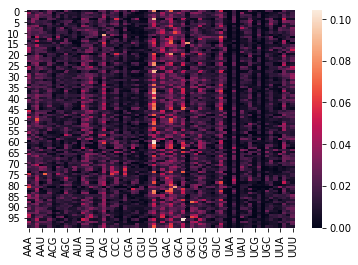

In [3]:
CodonFrame=Frame.iloc[:,-64:].head(100)
CodonFrame

sns_plot =sns.heatmap(CodonFrame)
figure= sns_plot.get_figure()
figure.savefig('CorrelationHeatmapmCodons.png', dpi=400, )

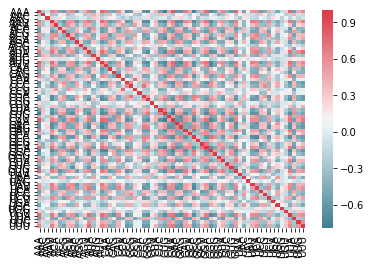

In [4]:
import seaborn as sns

corr = CodonFrame.corr()
sns_plot=sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('CorrelationHeatmapmCodons.png', dpi=400, )

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 6 artists>

Text(0, 0.5, 'Percentage of Explained Variance')

Text(0.5, 0, 'Principal Component')

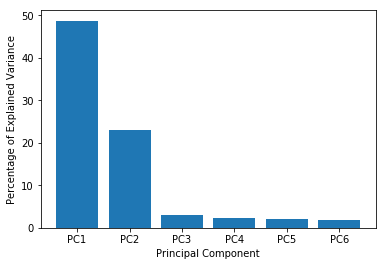

In [5]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
data=CodonFrame
inp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data=inp_mean.fit_transform(data)
scaled_data = preprocessing.scale(data.T)

pca = PCA(0.80) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.savefig('PCExplainedVarianceCodons.png')
plt.show()




In [6]:
#the following code makes a fancy looking plot using PC1 and PC2
table = { 
        'AUA':'I', 'AUC':'I', 'AUU':'I', 'AUG':'M', 
        'ACA':'U', 'ACC':'U', 'ACG':'U', 'ACU':'U', 
        'AAC':'N', 'AAU':'N', 'AAA':'K', 'AAG':'K', 
        'AGC':'S', 'AGU':'S', 'AGA':'R', 'AGG':'R',                  
        'CUA':'L', 'CUC':'L', 'CUG':'L', 'CUU':'L', 
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCU':'P', 
        'CAC':'H', 'CAU':'H', 'CAA':'Q', 'CAG':'Q', 
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGU':'R', 
        'GUA':'V', 'GUC':'V', 'GUG':'V', 'GUU':'V', 
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCU':'A', 
        'GAC':'D', 'GAU':'D', 'GAA':'E', 'GAG':'E', 
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGU':'G', 
        'UCA':'S', 'UCC':'S', 'UCG':'S', 'UCU':'S', 
        'UUC':'F', 'UUU':'F', 'UUA':'L', 'UUG':'L', 
        'UAC':'Y', 'UAU':'Y', 'UAA':'STOP', 'UAG':'STOP', 
        'UGC':'C', 'UGU':'C', 'UGA':'STOP', 'UGG':'W', 
    } 
stop_codons=["TAA", "TAG", "TGA"]
start_codons=["TTG", "CTG", "ATG"]
    
pca_df = pd.DataFrame(pca_data, index=CodonFrame.columns, columns=labels)
Protein=[]
pca_df.head(5)
for nucleotide in pca_df.index:
    if nucleotide in table:
        Protein.append(table[nucleotide])
        
    else:
        if nucleotide in stop_codons:
            Protein += ["StopCodon"]
        if nucleotide in start_codons:
            Protein.append("StartCodon")
pca_df["AA"]=Protein
pca_df.to_csv("PCACodonProjections.csv")
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
AAA,4.229725,12.087869,-0.460569,-0.549537,-1.944180,1.277095
AAC,1.902670,-0.959918,1.926511,-1.833360,0.692312,0.147754
AAG,10.405566,2.451577,-0.348340,-3.526740,-2.456593,-2.078895
AAU,-0.554479,6.176254,0.654632,0.387928,0.797253,-1.162520
ACA,-1.293533,3.562939,-1.345287,-0.561356,2.047530,-0.793140


,PC1,PC2,PC3,PC4,PC5,PC6,AA
AAA,4.229725,12.087869,-0.460569,-0.549537,-1.944180,1.277095,K
AAC,1.902670,-0.959918,1.926511,-1.833360,0.692312,0.147754,N
AAG,10.405566,2.451577,-0.348340,-3.526740,-2.456593,-2.078895,K
AAU,-0.554479,6.176254,0.654632,0.387928,0.797253,-1.162520,N
ACA,-1.293533,3.562939,-1.345287,-0.561356,2.047530,-0.793140,U
ACC,2.214899,-2.927995,-0.043907,-0.353892,0.396839,-2.499573,U
ACG,-7.122813,-5.033317,0.461195,0.429256,-0.512265,-0.271534,U
ACU,-2.563210,3.054990,-0.944824,-0.233115,2.588394,-0.220475,U
AGA,-4.087965,3.028355,0.089856,-1.028324,-0.370304,-0.079158,R
AGC,1.780328,-4.213816,-0.323767,-1.553679,-0.275485,0.206781,S


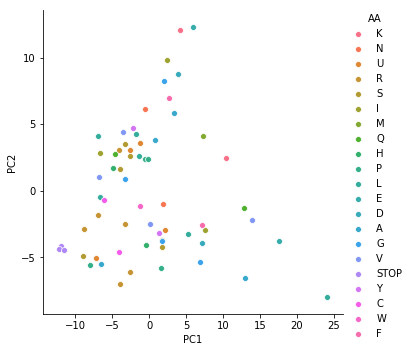

In [12]:
sns_plot=sns.pairplot(x_vars=["PC1"], y_vars=["PC2"], data=pca_df, hue="AA", size=5) 
sns_plot.savefig("output.png", dpi=400)

Text(0.5, 0, 'PC1 - 48.7%')

Text(0, 0.5, 'PC2 - 23.1%')

Text(4.229725458579178, 12.08786947563491, 'AAA')

Text(1.9026695027504719, -0.9599177680851855, 'AAC')

Text(10.405565508978203, 2.451577227866827, 'AAG')

Text(-0.5544787105865775, 6.176253830819058, 'AAU')

Text(-1.293533266927526, 3.562938686062972, 'ACA')

Text(2.2148990065875838, -2.9279954932344983, 'ACC')

Text(-7.1228133885177, -5.0333167753015005, 'ACG')

Text(-2.5632101982502418, 3.054989839231692, 'ACU')

Text(-4.087964939520417, 3.0283547293542608, 'AGA')

Text(1.7803277445474153, -4.213816466396266, 'AGC')

Text(-3.217105809623262, -2.472075354445234, 'AGG')

Text(-3.865877041972589, 1.6017914140288316, 'AGU')

Text(-6.620386287731527, 2.83014167085964, 'AUA')

Text(7.495393322815863, -2.924874610698308, 'AUC')

Text(7.286322230309641, 4.089717596107903, 'AUG')

Text(2.4583090809789114, 9.799472459711083, 'AUU')

Text(-4.569160022276331, 2.7512683613632603, 'CAA')

Text(-0.4794142872254691, -4.062008324118368, 'CAC')

Text(12.895211887815481, -1.3077590948291271, 'CAG')

Text(-4.925831168317546, 1.7212137400338339, 'CAU')

Text(-0.5448620973516, 2.419424073093622, 'CCA')

Text(1.5598019132433865, -5.817562806137996, 'CCC')

Text(-7.940445657369132, -5.572184852359613, 'CCG')

Text(-0.11254274742081129, 2.379070879276226, 'CCU')

Text(-6.974828074027465, -1.792787301734996, 'CGA')

Text(-3.926112946313249, -6.98164836098367, 'CGC')

Text(-2.6121318156748936, -6.119786763879168, 'CGG')

Text(-8.778695435599596, -2.8543715561153853, 'CGU')

Text(-6.676770828842403, -0.45173009482457327, 'CUA')

Text(5.310499648302259, -3.2741112038707456, 'CUC')

Text(24.098355719665886, -7.998484809593859, 'CUG')

Text(-1.797219190941269, 4.262652660325725, 'CUU')

Text(5.929860071541446, 12.292213293200499, 'GAA')

Text(7.125938196218372, -3.9591681543778403, 'GAC')

Text(17.531970383816528, -3.7873612993993877, 'GAG')

Text(3.870465212998991, 8.740174015588877, 'GAU')

Text(0.803616998065781, 3.8171660977813944, 'GCA')

Text(13.004381900925386, -6.54632948021504, 'GCC')

Text(-6.4956461358109046, -5.511546003606027, 'GCG')

Text(3.303246157080506, 5.849027298529621, 'GCU')

Text(2.032530492914969, 8.272735415311304, 'GGA')

Text(6.875827395548513, -5.329922318638803, 'GGC')

Text(1.7191163184075617, -3.810227438002009, 'GGG')

Text(-3.264925586248643, 0.9166957335619239, 'GGU')

Text(-6.7430015292881125, 1.052436346420301, 'GUA')

Text(0.11693461114508644, -2.4709282708060933, 'GUC')

Text(13.899343729351585, -2.195847365861651, 'GUG')

Text(-3.5003800780119256, 4.437506833978061, 'GUU')

Text(-11.89974849797347, -4.130520500805114, 'UAA')

Text(1.3663906253266975, -3.1445323492059676, 'UAC')

Text(-12.12992008003524, -4.384686060272804, 'UAG')

Text(-2.178413414422613, 4.69533656447207, 'UAU')

Text(-3.3102496611708414, 3.494554109876753, 'UCA')

Text(1.7441308031543454, -3.6680733582950094, 'UCC')

Text(-8.920561541879556, -4.916188774339753, 'UCG')

Text(-2.6198028032576586, 2.58732361686452, 'UCU')

Text(-11.500605979459047, -4.476145721264707, 'UGA')

Text(-4.015361467827977, -4.564406037062045, 'UGC')

Text(-1.1782906368486856, -1.1090606323297005, 'UGG')

Text(-6.055628303261992, -0.7313854982345718, 'UGU')

Text(-6.880217877696998, 4.150710440162968, 'UUA')

Text(7.157806007812101, -2.5632115799386175, 'UUC')

Text(-1.4261092464800817, 2.5781723779383854, 'UUG')

Text(2.663606825281215, 6.963183691807113, 'UUU')

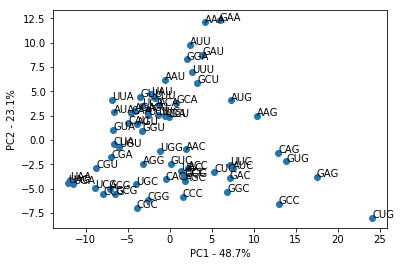

In [16]:
plt.scatter(pca_df.PC1, pca_df.PC2)
# plt.title('PCA of the 64 codons')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.savefig('PCAdim2Codons.png')
plt.show()

In [64]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
# dataset = pd.read_csv('50_Startups.csv')
X = CodonFrame
y = Frame['Liver_PTR']


# np.nan_to_num(X)
# #Convert the column into categorical columns

# states=pd.get_dummies(X['State'],drop_first=True)

# # Drop the state coulmn
# X=X.drop('State',axis=1)

# # concat the dummy variables
# X=pd.concat([X,states],axis=1)



# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.14780912918520184


In [59]:
X_test.iloc[:,1]
# X_test.iloc[0:,1]
X_test.iloc[:,1].mean()
type(y_test.iloc[1])
# X_test.iloc[:,1].join(y_test)

1585     0.014331
9105     0.010438
2916     0.018810
1516     0.028409
9113     0.021359
8902     0.018667
2495     0.003650
4209     0.014493
2869     0.007207
5927     0.024357
6939     0.013223
2506     0.009091
4219     0.019694
3270     0.023290
651      0.018576
5176     0.027282
10295    0.013728
8435     0.018832
2709     0.021442
2238     0.010204
1085     0.026882
11407    0.013557
1570     0.028302
3358     0.014742
8268     0.029940
930      0.012092
5386     0.018919
8571     0.016563
477      0.038202
2158     0.000000
           ...   
593      0.012121
7093     0.016304
2585     0.014599
2330     0.010088
7761     0.027559
693      0.006186
7346     0.017182
7227     0.033419
6141     0.019417
7766     0.025078
7049     0.018565
7512     0.027559
9365     0.014778
9788     0.029536
10067    0.023923
5460     0.000000
551      0.035789
8815     0.024570
10241    0.012712
2217     0.007711
10363    0.044444
8198     0.037975
2049     0.006993
9118     0.034137
11013    0

0.019432154101681132

numpy.float64

[Text(0, 0.5, 'Liver PTR'),
 Text(0.5, 0, 'AAC Frequency'),
 Text(0.5, 1.0, 'Real value and prediction of Liver PTR')]

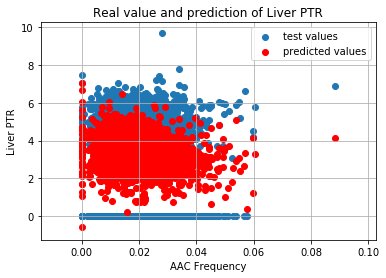

In [73]:
fig, ax = plt.subplots()
ax.scatter(X_test.iloc[:,1], y_test, label='test values') 
ax.scatter(X_test.iloc[:,1], y_pred , color='red', label='predicted values') 
ax.set(xlabel='AAC Frequency', ylabel='Liver PTR',
       title='Real value and prediction of Liver PTR' )
ax.grid()
ax.legend()
fig.savefig("Liver_PTRvsAACLinReg.png")
plt.show()
# plot(X_test.iloc[1,:], y_test) 

In [16]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
regressor = linear_model.Lasso(alpha=0.1)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [74]:
y_pred

array([4.125   , 4.125   , 3.203125, ..., 4.109375, 3.71875 , 4.828125])

{\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}} 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}